In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('cust_data.csv')

In [3]:
# Problem statement is we need to cluster this dataset in some groups based on the Annual Income
# and Spending Score to understand spending patter of people based on annual salary

# Here we are going to take only two independent variable 'Annual Income and Spending score' 
X= dataset.iloc[:,[3,4]].values    


In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

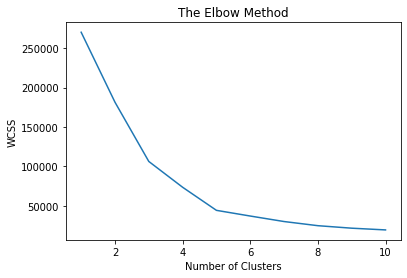

In [7]:
# We need to find out how many clusters we can use here to get solution of our problem statment 
# In order to find out what is optimal number of cluster we will use elbow method
# This is called as elbow method because shape of plot is like human bone elbow 
# Once we plot elbow method then we need to select K valaue
from sklearn.cluster import KMeans

wcss=[]         # Within cluster sum of squared 
for i in range(1,11):
    KMeans()
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)  #Kmeans++ - Algorithm used to initilise the centroids
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia gives a values of WCSS for each cluster as the for loop goes

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

""" By using elbow method we have consutructed a clusters which shows wcss value
wcss scores is basically summation of ecludian distance between the points that are actuall scattered
You will get two main diversion on the curve where we get a minimal number of WCSS value and based on that 
we will select how manay number of clusters are required"""


In [8]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)   # number of clusters = 5 as per elbow method
y_kmeans=kmeans.fit_predict(X)

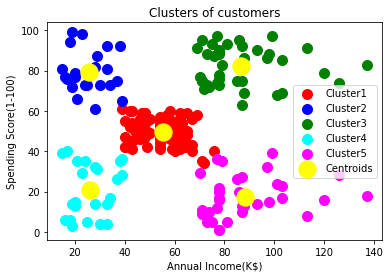

In [9]:
#Visualize the clusters

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()
